## **Task 1: 315 Bird Species - Classification ****
Data set of 315 bird species.45980 training images, 1575 test images (5 images per species) and 1575 validation images(5 images per species). All images are 224 X 224 X 3 color images in jpg format. Data set includes a train set, test set and validation set. Each set contains 315 sub directories, one for each bird species


### **Import Data**
The data is imported from google drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip gdrive/My\ Drive/data/315_Birds_Species.zip 

Streaming output truncated to the last 5000 lines.
  inflating: train/VARIED THRUSH/029.jpg  
  inflating: train/VARIED THRUSH/030.jpg  
  inflating: train/VARIED THRUSH/031.jpg  
  inflating: train/VARIED THRUSH/032.jpg  
  inflating: train/VARIED THRUSH/033.jpg  
  inflating: train/VARIED THRUSH/034.jpg  
  inflating: train/VARIED THRUSH/035.jpg  
  inflating: train/VARIED THRUSH/036.jpg  
  inflating: train/VARIED THRUSH/037.jpg  
  inflating: train/VARIED THRUSH/038.jpg  
  inflating: train/VARIED THRUSH/039.jpg  
  inflating: train/VARIED THRUSH/040.jpg  
  inflating: train/VARIED THRUSH/041.jpg  
  inflating: train/VARIED THRUSH/042.jpg  
  inflating: train/VARIED THRUSH/043.jpg  
  inflating: train/VARIED THRUSH/044.jpg  
  inflating: train/VARIED THRUSH/045.jpg  
  inflating: train/VARIED THRUSH/046.jpg  
  inflating: train/VARIED THRUSH/047.jpg  
  inflating: train/VARIED THRUSH/048.jpg  
  inflating: train/VARIED THRUSH/049.jpg  
  inflating: train/VARIED THRUSH/050.jpg  
  i

In [17]:
#Some Basic Imports
import matplotlib.pyplot as plt #For Visualization
import numpy as np              #For handling arrays
import pandas as pd             # For handling data
#Define Directories for train, test & Validation Set
train_path = '/content/train'
test_path = '/content/test'
valid_path = '/content/valid'
#Define some often used standard parameters
#The batch refers to the number of training examples utilized in one #iteration
batch_size = 16 
#The dimension of the images we are going to define is 224 x 224
img_height = 224
img_width = 224
#The dimension size of 500 or more than 500 with batch size greater than 16 may result in a crash as the RAM gets completely used in such cases. A lower dimension size with greater batch size is one of the options to try.

### **Data Augmentation**

The image Augmentation is a technique to expand the dataset.It is a recommended way to increase the size of orignal dataset by transforming the images i.e rotation, brightness,shifts,flips etc..
In this task, Keras ImageDataGenerator class is used for data augmentation.One of the main reason to choose this method for augmentation is that it provides real-time augmented images. Moreover, it requires lower memory usage.
In this task techniques used are:

1.   Zoom
2.   Flips
3.   Shear









In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Create Image Data Generator for Train Set
image_gen = ImageDataGenerator( 
                                 
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True,          
                               )
# Create Image Data Generator for Test/Validation Set
test_data_gen = ImageDataGenerator()



In the snippet below, 


*   The input is reformatted to dimension 224 by 224 as this ensures uniformity accross all images.
*   The validation split is 0.2. This implies that the 80% of data will be reserved for training and 20% for validation.
*   The subset for training, validation and testing is being created.


In [19]:
train = image_gen.flow_from_directory(
      train_path,
      
      target_size=(img_height, img_width),
      class_mode='categorical',
      batch_size=batch_size
      )
test = test_data_gen.flow_from_directory(
      test_path,
      target_size=(img_height, img_width),
      shuffle=False, 
      
      #setting shuffle as False just so we can later compare it with predicted values without having indexing problem 
      class_mode='categorical',
      batch_size=batch_size
      )
valid = test_data_gen.flow_from_directory(
      valid_path,
      target_size=(img_height, img_width),
      class_mode='categorical', 
     
      batch_size=batch_size
      )

Found 45980 images belonging to 315 classes.
Found 1575 images belonging to 315 classes.
Found 1575 images belonging to 315 classes.


### **Efficient Net**:
EfficientNet, introduced by Tan et al, is a convolutional neural network architecture and scaling method that uniformly scales all dimensions of :


*   Depth
*   Width
*   Resolutions


The compound scaling method is justified by the intuition that if the input image is bigger, then the network needs more layers to increase the receptive field and more channels to capture more fine-grained patterns on the bigger image.



In [20]:
# building a efficientnet model
import tensorflow as tf

base_model = tf.keras.applications.EfficientNetB5(include_top= False, weights = "imagenet")

In [21]:
import tensorflow as tf
from tensorflow.keras import layers

for layer in base_model.layers[:-5]:
  base_model.trainable = False


inputs = tf.keras.Input(shape=(224,224,3))

x = base_model(inputs)
x = layers.GlobalAveragePooling2D()(x)


outputs = layers.Dense(315, activation="softmax")(x)

eff_model = tf.keras.Model(inputs,outputs)

In [22]:
eff_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb5 (Functional)  (None, None, None, 2048)  28513527 
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_1 (Dense)             (None, 315)               645435    
                                                                 
Total params: 29,158,962
Trainable params: 645,435
Non-trainable params: 28,513,527
_________________________________________________________________


In [23]:

eff_model.compile(
    loss = tf.keras.losses.categorical_crossentropy,
    optimizer = tf.keras.optimizers.Adam(learning_rate= 0.001),
    metrics = ["accuracy"]
)

In [24]:
# fitting data to the model

model=eff_model.fit(train,
              epochs = 5,
              steps_per_epoch = len(train),
              validation_data = valid,
              validation_steps = len(valid)
              )

Epoch 1/5
2874/2874 [==============================] - 843s 288ms/step - loss: 0.9465 - accuracy: 0.8066 - val_loss: 0.1896 - val_accuracy: 0.9505
Epoch 2/5
2874/2874 [==============================] - 868s 302ms/step - loss: 0.2948 - accuracy: 0.9247 - val_loss: 0.1286 - val_accuracy: 0.9657
Epoch 3/5
2874/2874 [==============================] - 827s 288ms/step - loss: 0.2011 - accuracy: 0.9463 - val_loss: 0.1108 - val_accuracy: 0.9651
Epoch 4/5
2874/2874 [==============================] - 815s 284ms/step - loss: 0.1525 - accuracy: 0.9579 - val_loss: 0.1120 - val_accuracy: 0.9657
Epoch 5/5
2874/2874 [==============================] - 811s 282ms/step - loss: 0.1218 - accuracy: 0.9657 - val_loss: 0.0994 - val_accuracy: 0.9721


### **Graphs**

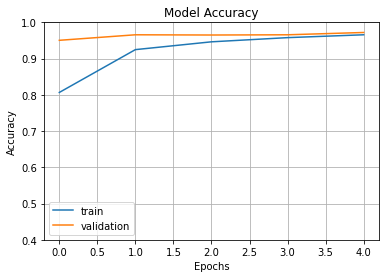

<Figure size 432x288 with 0 Axes>

In [25]:
fig1 = plt.gcf()
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()
plt.savefig('eff-acc-val-acc.png')

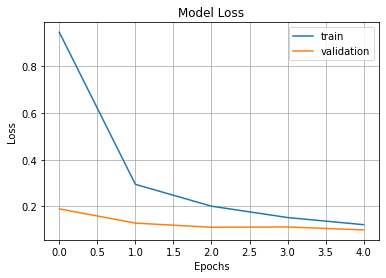

<Figure size 432x288 with 0 Axes>

In [26]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()
plt.savefig('vgg-loss-val.png')

### **Model Accuracy**

In [29]:
test_accu = eff_model.evaluate(test)
print('The testing accuracy is :',test_accu[1]*100, '%')

99/99 [==============================] - 24s 238ms/step - loss: 0.0682 - accuracy: 0.9803
The testing accuracy is : 98.031747341156 %


In [30]:
preds = eff_model.predict(test,verbose=1)

99/99 [==============================] - 26s 227ms/step


### **GRAD-CAM**
GradCam is an algorithm which shows that which part of the feature map, this CNN is giving importance for classification.


In [33]:
model =  tf.keras.applications.EfficientNetB5()
model.summary()

123478016/123465288 [==============================] - 6s 0us/step
Model: "efficientnetb5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 456, 456, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_2 (Rescaling)        (None, 456, 456, 3)  0           ['input_5[0][0]']                
                                                                                                  
 normalization_2 (Normalization  (None, 456, 456, 3)  7          ['rescaling_2[0][0]']            
 )                                                                                                
                  

In [34]:
# load the image and preprocess it
from tensorflow.keras.applications.resnet50 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import load_img,img_to_array
from numpy import expand_dims
img = load_img(('/content/5.jpg'), target_size=(224, 224))
img = img_to_array(img)
img = expand_dims(img, axis=0)
img = preprocess_input(img)

In [35]:
# separate the classifier layer names in a list
classifier_layer_names = ['top_conv', 'top_activation', 'avg_pool', 'top_dropout', 
                          'predictions']

In [36]:
# get the last conv layer
last_conv_layer = model.get_layer('top_conv')

In [38]:
# new model that outputs last conv layer's feature map
last_conv_layer_model = tf.keras.Model(model.inputs, last_conv_layer.output)

In [41]:
# We create a model that maps the activations of the last conv
# layer to the final class predictions

classifier_input = tf.keras.Input(shape=last_conv_layer.output.shape[1:])
x = classifier_input
for layer_name in classifier_layer_names:
  x = model.get_layer(layer_name)(x)
classifier_model = tf.keras.Model(classifier_input, x)

In [46]:

# Then, we compute the gradient of the top predicted class for our input image
# with respect to the activations of the last conv layer

with tf.GradientTape() as tape:
    # Compute activations of the last conv layer and make the tape watch it
    last_conv_layer_output = last_conv_layer_model(img)
    tape.watch(last_conv_layer_output)
    # Compute class predictions
    preds = classifier_model(last_conv_layer_output)
    top_pred_index = tf.argmax(preds[0])
    top_class_channel = preds[:, top_pred_index]

In [ ]:
# This is the gradient of the top predicted class with regard to
# the output feature map of the last conv layer
grads = tape.gradient(top_class_channel, last_conv_layer_output)

# This is a vector where each entry is the mean intensity of the gradient
# over a specific feature map channel
pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

# We multiply each channel in the feature map array
# by "how important this channel is" with regard to the top predicted class
last_conv_layer_output = last_conv_layer_output.numpy()[0]
pooled_grads = pooled_grads.numpy()
for i in range(pooled_grads.shape[-1]):
    last_conv_layer_output[:, :, i] *= pooled_grads[i]

# The channel-wise mean of the resulting feature map
# is our heatmap of class activation
heatmap = np.mean(last_conv_layer_output, axis=-1)

# For visualization purpose, we will also normalize the heatmap between 0 & 1
heatmap = np.maximum(heatmap, 0) / np.max(heatmap)

49152/35363 [=========================================] - 0s 0us/step
[('n01943899', 'conch', 0.65406895)]


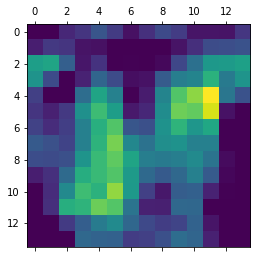

<Figure size 432x288 with 0 Axes>

In [ ]:
from keras.applications.vgg16 import decode_predictions

# print top class prediction

print(decode_predictions(model.predict(img), top=1)[0])
# Display heatmap
plt.matshow(heatmap)
plt.show()
plt.savefig('grad-camvgg.pdf')

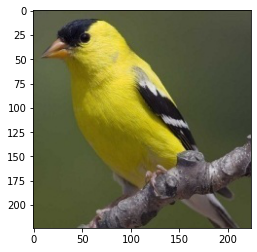

<Figure size 432x288 with 0 Axes>

In [45]:
from skimage.transform import resize
# load original image
orig_img = tf.keras.preprocessing.image.load_img('/content/5.jpg')

# upsample the heatmap
#upsample = resize(heatmap, (224,224),preserve_range=True)

# show the heatmap overlayed on original image
plt.imshow(orig_img)
# plt.imshow(upsample,alpha=0.7)
plt.show()
plt.savefig('gradcamorig.pdf')

### **Conclusion:**
Efficient has performed better than VGG16.



NOTE: Grad-cam issue not resolved

**References**:

https://towardsdatascience.com/how-to-successfully-add-large-data-sets-to-google-drive-and-use-them-in-google-colab https://github.com/visionatseecs/keras-starter/blob/main/keras_grad_cam.ipynb https://www.analyticsvidhya.com/blog/2020/08/image-augmentation-on-the-fly-using-keras-imagedatagenerator/ 
https://keras.io/examples/vision/image_classification_efficientnet_fine_tuning/
https://www.kaggle.com/sauravbhuyan/315-bird-with-efficientnetb5
https://paperswithcode.com/method/efficientnet
lab 6